In [1]:
import numpy as np, healpy as hp, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_spec(qobj,rlz=None,cn=1,lmin=40,lmax=2048,bnum=10,output=True):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Mkk, Vkk, Skk, __, nb = local.load_spec(qobj,mb,rlz=rlz,cn=cn,outN0=True)
    #Mkk = np.mean(Skk,axis=0)
    #Vkk = np.std(Skk,axis=0)
    print(np.sqrt(np.sum(Mkk**2/Vkk**2)))
    st = ana.amplitude(Mkk,Skk,fcb=None,diag=False,disp=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$C_L^{\kappa\kappa}$')
    errorbar(mb.bc+5,Mkk,yerr=Vkk,fmt='o')
    plot(aobj.l,aobj.ckk,color='k',ls='--')
    axhline(0,color='k')
    show()
    if output: return mb, Mkk, Vkk, nb

In [3]:
def plot_bias(qobj,cn=1):
    pl.plot_1dstyle(fsize=[10,4],xmin=2,xmax=2048,ymin=1e-9,ymax=1e-4,ylog=True,ylab='$C_L^{\kappa\kappa}$')
    l, al = (np.loadtxt(qobj.f['TT'].al,usecols=(0,cn))).T
    l, n0 = (np.loadtxt(qobj.f['TT'].n0bs,usecols=(0,cn))).T
    l, ml = (np.loadtxt(qobj.f['TT'].ml[1],usecols=(0,cn))).T
    l, cl = (np.loadtxt(qobj.f['TT'].mcls,usecols=(0,cn))).T
    plot(l,al,label='norm')
    plot(l,n0,label='N0')
    plot(l,ml,label='MF')
    plot(l,cl/99.,label='MF-MC')
    legend()

In [9]:
dirs = local.data_directory()
qobj, Qobj = {}, {}
for wtype, ascale in [('com16v0PT',1.)]:
    aobj = local.init_analysis_params(qid='comb_s16d',ascale=ascale,wtype=wtype)
    qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

8.95982880637892
obs A 1.0 mean(A) 1.001 sigma(A) 0.154 S/N 6.481 A>oA 0.96


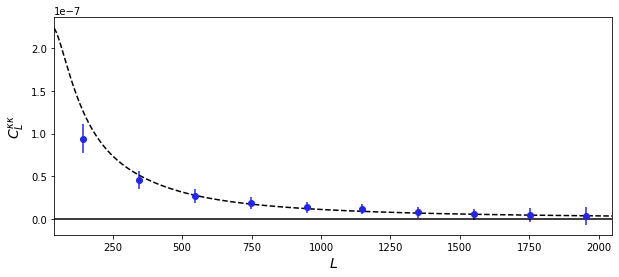

In [10]:
mb, mkk, vkk, nb = plot_spec(qobj['com16v0PT'],cn=1,bnum=10)